In [1]:
#### load packages, *.h5 folder and exp.h5 file location
%matplotlib widget

In [4]:
from essential_func import *
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

samples_csv                = 'data_directory.csv'
default_sample_dir         = 'Mar-2023-Sample#1898'        # 'July-2021-Sample#6'    '21-Nov'   'July-sorted'   '20-Dec'    '22-Oct'   'Oct-2022-1971'
csv_and_code_abs_directory = '/Users/bashit.a/Documents/Alzheimer/Codes/'

_,dropdown_name_list, cwd, exp_folder = change_python_path(dropdown_name = default_sample_dir, csv_file_location = csv_and_code_abs_directory, samples_csv = samples_csv)

Python directory is set to load samples from : Mar-2023-Sample#1898


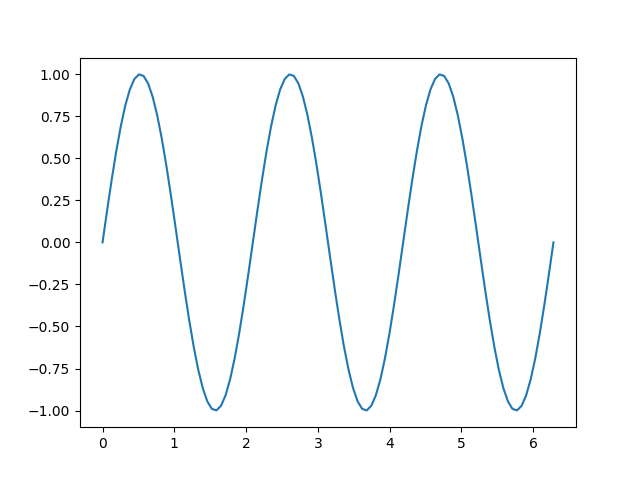

In [8]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

Output()

interactive(children=(Button(description='Save Plot', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

<function __main__.save_plot()>

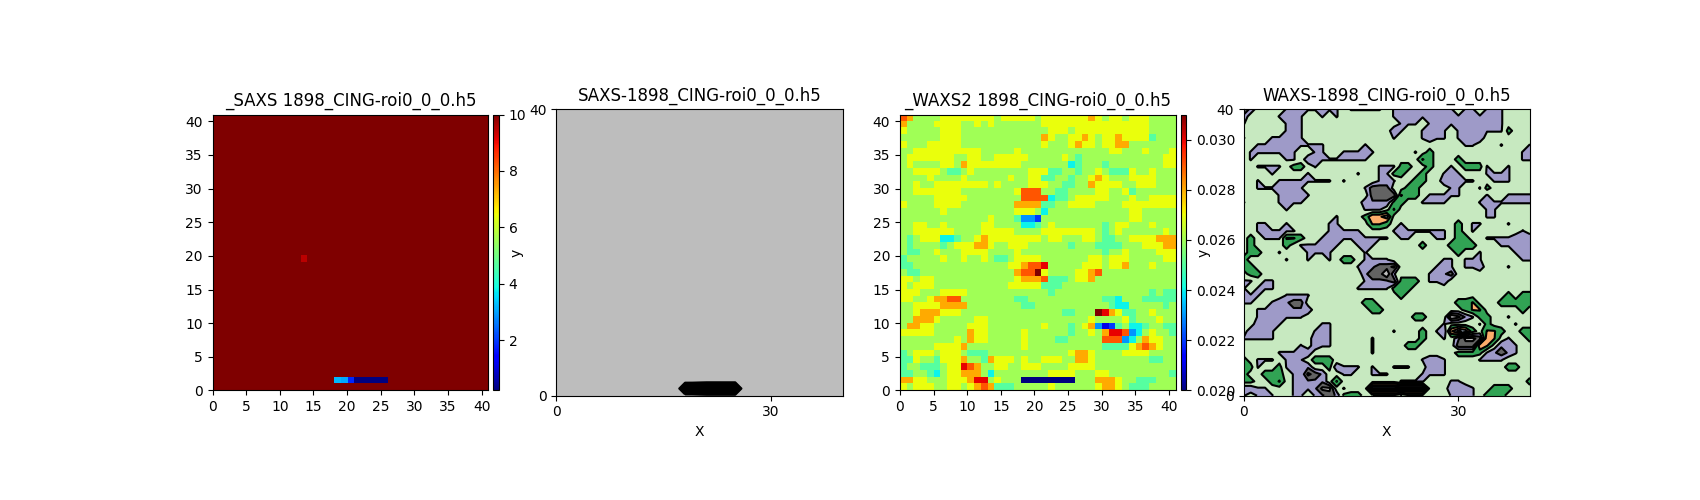

In [10]:
### show heat map for any file -- (Independent cell) - files are required to have azimuthal averaged
%matplotlib widget
from ipywidgets import fixed

default_saxs_inc = 0.001
default_waxs_inc = 0.001

dropdown_dir   = ipywidgets.Dropdown(options= dropdown_name_list,           value = default_sample_dir,              description='Folder ',       disabled=False)
dropdown_file  = ipywidgets.Dropdown(options= cwd_files_search_with('.h5'), value = cwd_files_search_with('.h5')[0], description='File ',         disabled=False)
cmap_heatmap   = ipywidgets.Dropdown(options= cmap_list(),                  value = 'jet',                           description='Color Map ',    disabled=False)
cmap_contour   = ipywidgets.Dropdown(options= cmap_list(),                  value = 'tab20c',                        description='Color Map ',    disabled=False)
rep_value      = ipywidgets.Dropdown(options= ['circ', 'point-WAXS', 'point-SAXS'], value = 'circ',                  description='Rep ',          disabled=False)
data_binning   = ipywidgets.Checkbox(value  = True,                 style= {'description_width': 'initial'}   ,      description='Data Binning ', disabled=False)
q_value_widget = ipywidgets.FloatSlider(value = 1.34, min= qgrid2[0], max=qgrid2[-1], step=0.001,       description='q Value:', disabled=False, continuous_update=False, layout=ipywidgets.Layout(width='25%'), readout=True, readout_format='.4f', style= {'description_width': 'initial'})    
q_value_widget.layout.visibility = 'hidden'                                 # 'hidden' or 'visible'

saxs_max_widget = ipywidgets.FloatSlider(value = 10,     min= 0,       max= 500, step=1 ,                   description='SAXS Max:',  continuous_update=False, layout=ipywidgets.Layout(width='25%'), readout=True, readout_format='.4f', style= {'description_width': 'initial'})    
saxs_inc_widget = ipywidgets.FloatSlider(value = default_saxs_inc,     min= 0.0001, max= 200, step=0.001 ,  description='SAXS Inc.:', continuous_update=False, layout=ipywidgets.Layout(width='25%'), readout=True, readout_format='.4f', style= {'description_width': 'initial'})    
waxs_max_widget = ipywidgets.FloatSlider(value = 0.035,  min= 0.001,   max= 1, step=0.001 ,                 description='WAXS Max:',  continuous_update=False, layout=ipywidgets.Layout(width='25%'), readout=True, readout_format='.4f', style= {'description_width': 'initial'})    
waxs_inc_widget = ipywidgets.FloatSlider(value = default_waxs_inc,     min= 0.0001, max= 0.035, step=0.001, description='WAXS Inc.:', continuous_update=False, layout=ipywidgets.Layout(width='25%'), readout=True, readout_format='.4f', style= {'description_width': 'initial'})    
contour_level_widget   = ipywidgets.IntSlider(value=9,                 min=3,       max=30,                 description='Contour Level.:', continuous_update=False, layout=ipywidgets.Layout(width='25%'), readout=True,                   style= {'description_width': 'initial'})    

### set saxs-waxs max, value, step update according to file
def set_saxs_waxs_widget(diff_patterns, scattering):

    if scattering == '_SAXS':
        ### entend widget max just to avoid error when setting min        
        if np.min(diff_patterns) > saxs_max_widget.max:
            saxs_max_widget.max   = np.max(diff_patterns)
        
        saxs_max_widget.min   = np.min(diff_patterns)
        saxs_max_widget.max   = np.max(diff_patterns)
        saxs_max_widget.step  = saxs_max_widget.max/100

        saxs_inc_widget.max   = saxs_max_widget.value
        saxs_inc_widget.step  = saxs_max_widget.value/1000

    elif scattering == '_WAXS2':
        ### entend widget max just to avoid error when setting min
        if np.min(diff_patterns) > waxs_max_widget.max:
            waxs_max_widget.max   = np.max(diff_patterns)
            
        waxs_max_widget.min   = np.min(diff_patterns)
        waxs_max_widget.max   = np.max(diff_patterns)
        waxs_max_widget.step  = waxs_max_widget.max/100

        waxs_inc_widget.max   = waxs_max_widget.value
        waxs_inc_widget.step  = waxs_inc_widget.max/1000

def saxs_waxs_max_inc_visibility(saxs_max, saxs_inc, waxs_max, waxs_inc):
    saxs_max_widget.layout.visibility = saxs_max
    saxs_inc_widget.layout.visibility = saxs_inc
    waxs_max_widget.layout.visibility = waxs_max
    waxs_inc_widget.layout.visibility = waxs_max

def heat_map(file, cmap_heatmap, cmap_contour, data_binning, saxs_max, saxs_inc, waxs_max, waxs_inc, rep_value, q_value, level):


    Width, Height = width_height(file)

    if rep_value == 'circ':
        
        f = plt.figure(figsize=(17,5), constrained_layout=False)
        ax = f.subplots(nrows=1, ncols=4, )
        
        # saxs wax max-inc visibility
        saxs_waxs_max_inc_visibility(saxs_max = 'visible', saxs_inc = 'visible', waxs_max = 'visible', waxs_inc = 'visible')
        q_value_widget.layout.visibility = 'hidden' # 'hidden' or 'visible'
        
        for scattering in ('_SAXS','_WAXS2'):
            diff_patterns = find_rep_value(qgrid2, read_Iq(file, scattering) , method = 'circ')
            set_saxs_waxs_widget(diff_patterns, scattering)
        
        f,img_orig = plot_heat_map_from_file(file, qgrid2, scatterings = ('_SAXS','_WAXS2'), heatmap_rep_value = 'circ', arg_qvalue = None, cmap = cmap_heatmap, args = (f,(ax[0],ax[2])), data_binning=data_binning, bins = [np.fromiter(drange(0, saxs_max, saxs_inc), float), np.fromiter(drange(0, waxs_max, waxs_inc), float)] )  # discrete_cmap(N=5, base_cmap = 'cubehelix')     viridis
        
                ### contour plot
        try:
            ax[1].clear()
            us = np.linspace(np.min(img_orig[0]), np.max(img_orig[0]), level, endpoint=True) # For Manual selection of colour bar
            cf = ax[1].contourf(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig[0],0), us, origin='lower', cmap=cmap_contour, )
            ax[1].contour(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig[0],0), us, colors='k') # For plotting only contours
            ax[1].set_aspect('equal')    
            ax[1].set(title = f'SAXS-{file}', xlabel = 'X' , ylabel = 'y', xscale='linear', yscale ='linear' , xticks = np.arange(0 , Width,30), yticks=np.arange(0, Height, 40))
            
            ax[3].clear()
            us = np.linspace(np.min(img_orig[1]), np.max(img_orig[1]), level, endpoint=True) # For Manual selection of colour bar
            cf = ax[3].contourf(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig[1],0), us, origin='lower', cmap=cmap_contour, )
            ax[3].contour(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig[1],0), us, colors='k') # For plotting only contours
            ax[3].set_aspect('equal')    
            ax[3].set(title = f'WAXS-{file}', xlabel = 'X' , ylabel = 'y', xscale='linear', yscale ='linear' , xticks = np.arange(0 , Width,30), yticks=np.arange(0, Height, 40))
            
        except:
            pass
        
    elif rep_value.find('point') == 0:              # x = point-waxs or x = point-saxs then x.find('point') =0

        f = plt.figure(figsize=(17,5), constrained_layout=False)
        ax = f.subplots(nrows=1, ncols=3, )
        
        q_value_widget.layout.visibility = 'visible' # 'hidden' or 'visible'
        scattering = '_WAXS2' if rep_value == 'point-WAXS' else '_SAXS'

        # q value min-max defining by choosing first frame
        Iq = read_Iq(file, scattering, frame = 0)
        idx_l, idx_u, _ = valid_idx_search(qgrid2, Iq.reshape(1,-1))
        print(f'{scattering} Range q ~ {qgrid2[idx_l]:0.4f} to {qgrid2[idx_u-1]:0.4f}')
        q_value_widget.min   = qgrid2[idx_l]
        q_value_widget.max   = qgrid2[idx_u-1]
        q_value_widget.value = np.percentile(qgrid2[idx_l:idx_u],15) if q_value < q_value_widget.min or q_value > q_value_widget.max else q_value
        print(f'q widget value is : {q_value_widget.value:0.4f}, function qvalue is : {q_value:0.4f}')
        
        Iq = read_Iq(file, scattering)
        diff_patterns = find_rep_value(qgrid2, Iq , args=q_value_widget.value, method = 'point')
        set_saxs_waxs_widget(diff_patterns, scattering)

        # saxs wax max-inc visibility
        saxs_waxs_max_inc_visibility(saxs_max = 'hidden', saxs_inc = 'hidden', waxs_max = 'visible', waxs_inc = 'visible') if scattering == '_WAXS2' else saxs_waxs_max_inc_visibility(saxs_max = 'visible', saxs_inc = 'visible', waxs_max = 'hidden', waxs_inc = 'hidden')
        bins = np.fromiter(drange(0, waxs_max, waxs_inc), float) if scattering == '_WAXS2' else np.fromiter(drange(0, saxs_max, saxs_inc), float)
        f,img_orig = plot_heat_map_from_file(file, qgrid2, scatterings = (scattering,), heatmap_rep_value = 'point', arg_qvalue = q_value, cmap = cmap_heatmap, args = (f,ax[0]), data_binning=data_binning, bins = bins )  # discrete_cmap(N=5, base_cmap = 'cubehelix')     viridis

        q_values = qgrid2[idx_l:idx_u-1]
        stds = np.zeros_like(q_values)
        for q_ in range(len(q_values)):
            stds[q_] = np.std(Iq[:,q_])
        
        ax[1].clear()
        ax[1].plot(q_values, stds,'blue')
        idx = qgrid_to_indices(q_values, qvalue=q_value)
        ax[1].scatter(q_values[idx], stds[idx],color='red', marker = 'o')
        ax[1].set(xlabel = "q", ylabel = "std")
    
        ### contour plot
        try:
            ax[2].clear()
            us = np.linspace(np.min(img_orig), np.max(img_orig), level, endpoint=True) # For Manual selection of colour bar
            cf = ax[2].contourf(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig,0), us, origin='lower', cmap=cmap_contour, )
            ax[2].contour(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig,0), us, colors='k') # For plotting only contours
            ax[2].set_aspect('equal')    
            ax[2].set(title = f'{scattering}-{file}', xlabel = 'X' , ylabel = 'y', xscale='linear', yscale ='linear' , xticks = np.arange(0 , Width,30), yticks=np.arange(0, Height, 40))
        except:
            pass

    print(f'File = {file}, SAXS-MAX = {saxs_max:0.3f}, SAXS-INC = {saxs_inc:0.3f}, WAXS-MAX = {waxs_max:0.3f}, WAXS-INC = {waxs_inc:0.3f}, cmap = {cmap_heatmap}')
    print(f'File = {file}, Width, Height = {width_height(file)}')

    plt.tight_layout()

def save_plot():
    plt.savefig(f'{dropdown_file.value}.tif', bbox_inches='tight', dpi=300) # Saving the image as an eps file

### change dropdown_file lists when directory is changed
def update_samples_list(*args):
    global cwd, exp_folder
    _, cwd, exp_folder = change_python_path(dropdown_name = dropdown_dir.value, csv_file_location = csv_and_code_abs_directory, samples_csv = samples_csv)
    dropdown_file.options = cwd_files_search_with('.h5')
    dropdown_file.value = cwd_files_search_with('.h5')[0]
dropdown_dir.observe(update_samples_list)

ui  = ipywidgets.VBox([ipywidgets.HBox([dropdown_dir, dropdown_file, cmap_heatmap, data_binning, rep_value, q_value_widget]), ipywidgets.HBox([saxs_max_widget, saxs_inc_widget, waxs_max_widget, waxs_inc_widget]), ipywidgets.HBox([contour_level_widget, cmap_contour])])
out = ipywidgets.interactive_output(heat_map, {'file' : dropdown_file, 'cmap_heatmap' : cmap_heatmap,'cmap_contour' : cmap_contour, 'data_binning' : data_binning, 'saxs_max' : saxs_max_widget, 'saxs_inc' : saxs_inc_widget , 'waxs_max' : waxs_max_widget, 'waxs_inc' : waxs_inc_widget, 'rep_value' : rep_value, 'q_value' : q_value_widget, 'level': contour_level_widget})
# out = ipywidgets.interact(heat_map, file = dropdown_file, cmap=cmap, data_binning=data_binning, saxs_max=saxs_max_widget, saxs_inc=saxs_inc_widget , waxs_max=waxs_max_widget, waxs_inc=waxs_inc_widget, rep_value=rep_value, q_value=q_value_widget)
display(out, ui)
ipywidgets.interact_manual.opts['manual_name'] = 'Save Plot'
ipywidgets.interact_manual(save_plot)

Minimum, Maximum Iq : 0.0082, 0.0602


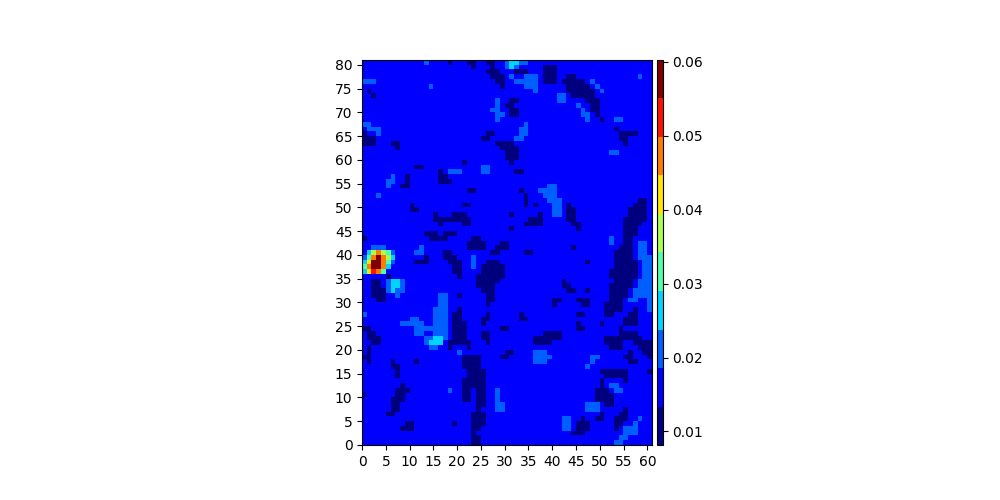

In [42]:
### low pass filtered and q~1.3 to q~1.32 Heatmap
%matplotlib widget
from scipy import signal
file = "2048_B8_masked.h5"     #'2029_Dentate_gyrus-roi0_masked.h5'
window_size = 4
scattering = 'merged'          # covers both SAXS and WAXS
directory  = '/Volumes/HDD/BNL-Data/Dec-2020/' # '/Users/bashit.a/Documents/Alzheimer/Dec-2020/'#'/Users/bashit.a/Documents/Alzheimer/July-2021/BNL-Data/sample-6/'
id_l, id_u = qgrid_to_indices(qgrid2, 1.3) , qgrid_to_indices(qgrid2, 1.32) 

### computation
Iq = read_Iq(file, scattering, directory=directory)      # Iq shape (3721, 690)
Iq = Iq[:,id_l:id_u]
Width, Height = width_height(file ,directory=directory)
window  = np.ones(window_size)/window_size

Iq_f = np.zeros_like(Iq);
for frame in range(len(Iq)):
    Iq_f[frame] = np.convolve(window, Iq[frame], 'same')                   # outputs same length output and will be used for area and plotting
# Iq_new = Iq - Iq_f

diff_patterns = find_rep_value(qgrid2, Iq_f, method = 'circ')
img_orig = snaking(Width, Height, diff_patterns)

f, ax = plt.subplots(1, 1, num=f'{file} Heat maps', figsize=(10,5))
plot_heat_map_from_data(img_orig, Width, Height, args=(f,ax), title= None, cmap=discrete_cmap(N=10, base_cmap = 'jet'))

interactive(children=(Dropdown(description='File : ', options=('._1934_B8_masked.h5', '._1934_SN.h5', '._2048_…

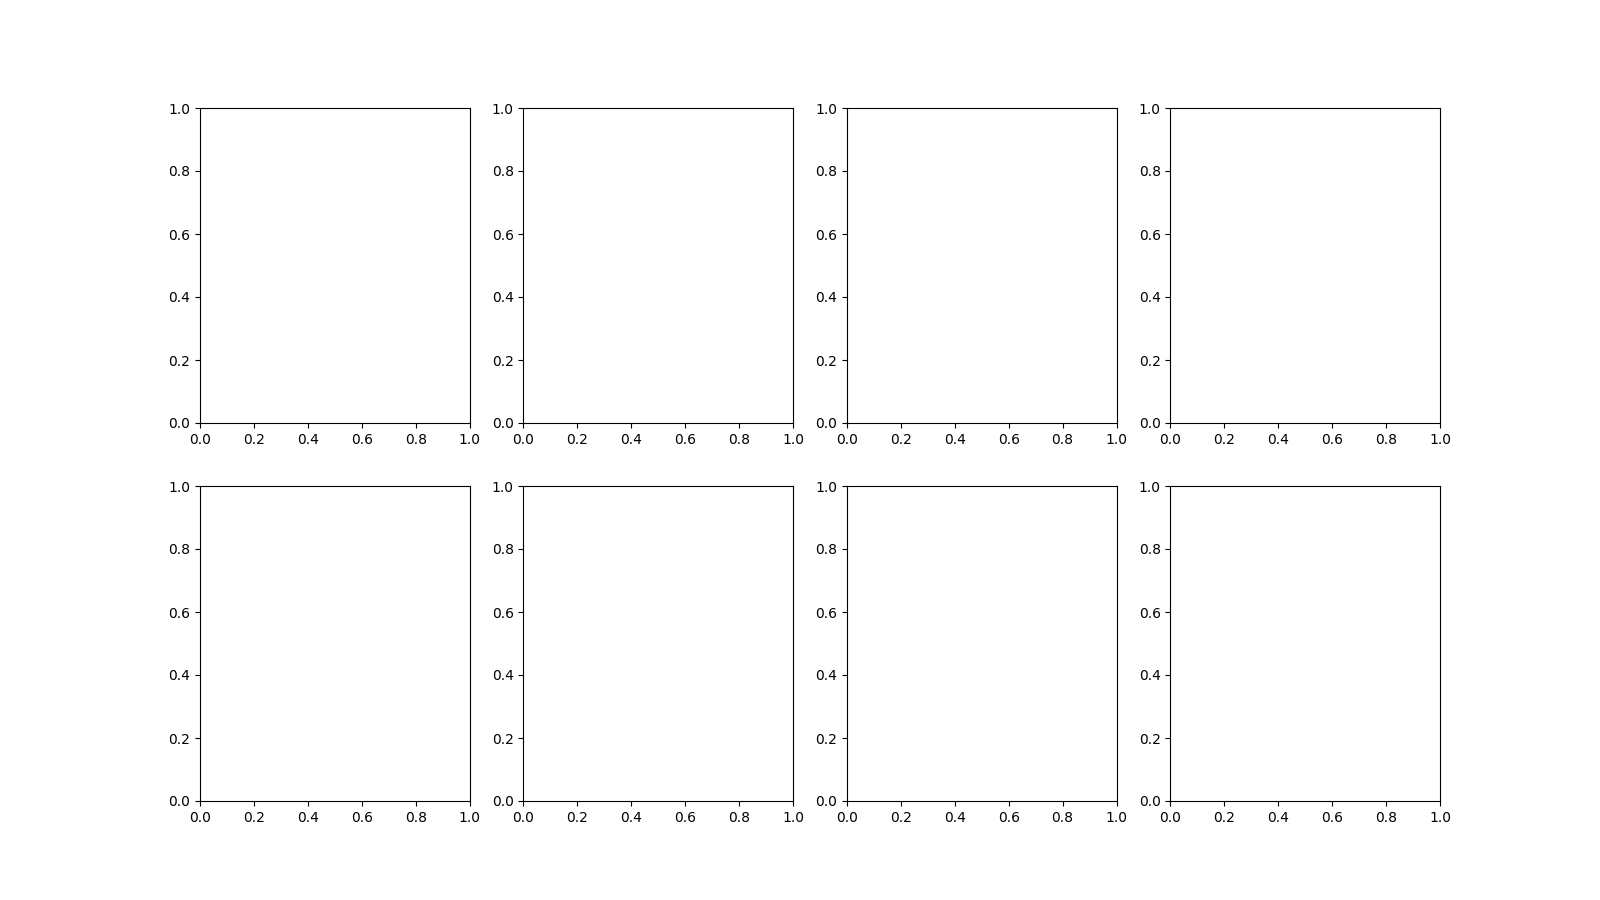

In [9]:
################# --------- Find Q range to plot heat maps --------- #################
%matplotlib widget
import ipywidgets         # from IPython.display import display; display(amp)
from ipywidgets import fixed

# semi-specs
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

### q_low, q_high, q_low - idx[2] and q_high + idx[2] for poly fit, number of points
indices = ((0.115, 0.19, 13,   48, '_SAXS' , 'bumpy'),      # 72, 81
           (1.48,  1.57, 10, 4.15, '_WAXS2', 'paraffin'),   # 345, 355
           (1.30,  1.42, 10,  4.7, '_WAXS2', 'amyloid'),    # 309, 323
           (1.89,  1.93,  7,  3.2, '_WAXS2', 'mica')        # 427, 433
          )

## polyhit with heatmap from drop down list
files = cwd_files_search_with('.h5')
dropdown = ipywidgets.Dropdown(options=files, value = files[0],description='File : ', disabled=False)
ipywidgets.interactive(file_polyfit_heatmap_plot, file = dropdown, indices = fixed(indices), qgrid2 = fixed(qgrid2))

## polyhit with heatmap for one file
# file = '2048_B8.h5'
# file_polyfit_heatmap_plot(file, indices, qgrid2)

In [2]:
### Merge all PDFs in the directory specified
### you can put all your pdfs that you want to merge to the PDF folder
from essential_func import *
pdfs_merging(directory = '/PDF', output = 'result.pdf')

Minimum, Maximum Iq : 0.0192, 0.0473
Total clusters =  40
label 1: [7807, 7690, 7680, 7681, 7565]
label 2: [7556, 7557, 7438, 7437, 7436, 7435, 7429, 7430, 7431, 7432, 7311, 7310, 7309, 7308, 7306]
label 3: [7048, 7049, 6937, 6936, 6935, 6922, 6923]
label 4: [7055, 6930]
label 5: [6798, 6799, 6800, 6684, 6683, 6682, 6681, 6671, 6672, 6673, 6674, 6558, 6557, 6556, 6555, 6546, 6547, 6548, 6431, 6430, 6429, 6420, 6421, 6422, 6304, 6303]
label 6: [6174, 6173, 6048, 6047]
label 7: [5931, 5930, 5912, 5913, 5806, 5805, 5785, 5680, 5679, 5659, 5660, 5554, 5553, 5552, 5533, 5534, 5535, 5428, 5427, 5426, 5408, 5409, 5301]
label 8: [5802]
label 9: [5058, 5057]
label 10: [4798, 4797, 4778]
label 11: [4677]
label 12: [4415, 4404]
label 13: [4278, 4279, 4280, 4163, 4162, 4161, 4152, 4153, 4154, 4037, 4036]
label 14: [4149, 4040]
label 15: [4156]
label 16: [3911, 3910, 3900, 3901, 3785, 3784, 3783, 3782]
label 17: [3749, 3750, 3685, 3684, 3683]
label 18: [3639, 3640, 3542]
label 19: [3287, 3286]
labe

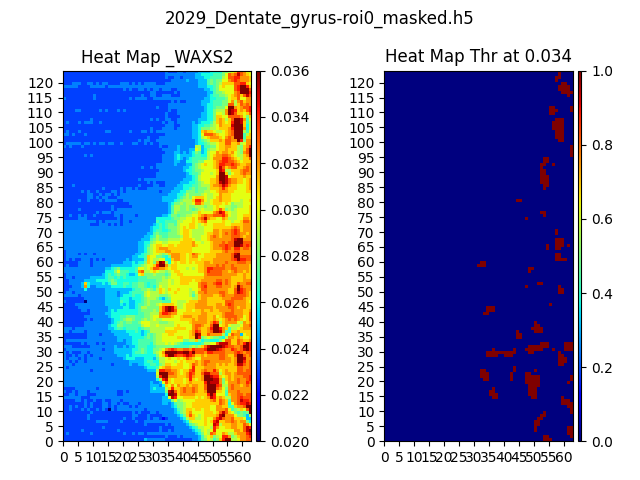

In [2]:
### Produce heatmap and cluster frames by thresholding
%matplotlib widget

# spec
file = '2029_Dentate_gyrus-roi0_masked.h5'
scattering = '_WAXS2'
scattering_max = 0.0361
thr            = 0.034
scattering_inc = 0.001

# computation
Width, Height = width_height(file)
img_orig =  discritize_scattering(file, qgrid2, scattering, data_binning=True, bins=np.fromiter(drange(0, scattering_max, scattering_inc), float), directory=os.getcwd() )
gray_img,_ = global_thresholding(img_orig, thr, binary_inv = False)

# plot
f,axs = plt.subplots(nrows=1, ncols=2)
plot_heat_map_from_data(img_orig, Width, Height, args = (f, axs[0]), title= f'Heat Map {scattering}', cmap="jet")
plot_heat_map_from_data(gray_img, Width, Height, args = (f, axs[1]), title= f'Heat Map Thr at {thr}', cmap="jet")
plt.suptitle(f'{file}')
plt.tight_layout()

labeled_array, num_features = label(gray_img, np.ones((3,3)))
print('Total clusters = ', num_features)

Width, Height = labeled_array.shape[1], labeled_array.shape[0]
sna = snaking(Width, Height , np.arange(0, Width*Height))


dict_label = {}
for i in np.unique(labeled_array):
    if i!=0:
        dict_label[i] = sna[labeled_array==i]
        print(f'label {i}: {list(dict_label[i])}')

In [8]:
### 1d circularly averaged data for masked file
%matplotlib widget
import ipywidgets   # from IPython.display import display; display(amp)
from IPython.display import display, clear_output

# anyinitialized masked_file will be removed beginning of the cell
try : del source_file
except NameError: pass

# specs 
source_file = "1898_HIPPO-roi0_0_0.h5"         # comment out to avoid plotting  # must input source file name   '1934_B8_masked.h5'
masked_file = "1898_HIPPO-roi0_0_0_masked.h5"          # "2048_B8_masked.h5"
scattering = ('_SAXS', '_WAXS2',)
frames = None

# computation
Width, Height = width_height(masked_file)    # considering the fact that width and height is same for source and masked file
n_patterns = Width*Height

f,axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
plot_heat_map_from_file(source_file, qgrid2, scatterings = (scattering[1],), cmap = 'viridis', args = (f, axs[0,1]))
plot_heat_map_from_file(masked_file, qgrid2, scatterings = (scattering[1],) , cmap = 'jet', args = (f, axs[0,2]), data_binning=False, bins = np.fromiter(drange(0, 0.04, 0.001), float) )  # discrete_cmap(N=5, base_cmap = 'cubehelix')     viridis
plot_heat_map_from_file(masked_file, qgrid2, scatterings = (scattering[0],) , cmap = 'jet', args = (f, axs[1,2]), data_binning=False, bins = np.fromiter(drange(0, 20, 0.5), float) )      # discrete_cmap(N=5, base_cmap = 'cubehelix')     viridis

def update_plot(frame):
    axs[0,0].clear()
    axs[1,0].clear()

    axs[0,0].set_yscale('log')
    axs[1,0].set_yscale('log')

    axs[0,0].set_xlabel('q'); axs[0,0].set_ylabel('log(I)');
    axs[1,0].set_xlabel('q'); axs[1,0].set_ylabel('log(I)');

    Iq_M_SAXS = read_Iq(masked_file, scattering[0])   # Source must be read even you do mask or not
    Iq_M_WAXS = read_Iq(masked_file, scattering[1])   # Source must be read even you do mask or not

    try:
        source_file
        if source_file ==  masked_file:
            axs[0,0].plot(qgrid2, Iq_S_WAXS[frame], label = f' Fr- {frame}');
            # waxs_diff_image(masked_file, frame, f, axs[0,1])

            axs[1,0].plot(qgrid2, Iq_S_SAXS[frame], label = f' Fr- {frame}');
            # saxs_diff_image(masked_file, frame, f, axs[1,1])

        else:
            Iq_S_SAXS = read_Iq(source_file, scattering[0])
            Iq_S_WAXS = read_Iq(source_file, scattering[1])

            axs[0,0].plot(qgrid2, Iq_S_WAXS[frame], label = f'Before Mask Fr- {frame}');
            axs[0,0].plot(qgrid2, Iq_M_WAXS[frame], label = f'After Mask Fr- {frame}'); 
            waxs_diff_image(masked_file, frame, f, axs[0,1])

            axs[1,0].plot(qgrid2, Iq_S_SAXS[frame], label = f'Before Mask Fr- {frame}');
            axs[1,0].plot(qgrid2, Iq_M_SAXS[frame], label = f'After Mask Fr- {frame}');
            saxs_diff_image(masked_file, frame, f, axs[1,1])

    except NameError:
        axs[0,0].plot(qgrid2, Iq_M_WAXS[frame], label = f' Fr- {frame}');
        # waxs_diff_image(masked_file, frame, f, axs[0,1])

        axs[1,0].plot(qgrid2, Iq_M_SAXS[frame], label = f' Fr- {frame}');
        # saxs_diff_image(masked_file, frame, f, axs[1,1])

    axs[0,0].legend()
    axs[1,0].legend()
    plt.suptitle(f'{masked_file}')
    plt.tight_layout()

if frames == None :
    frame = ipywidgets.IntSlider(min=0, max=n_patterns-1, value=0, description = "Frame", continuous_update=False)
else :
    frame = ipywidgets.SelectionSlider(value = frames[0], options = frames, continuous_update=False)

ipywidgets.interactive(update_plot, frame=frame)

OSError: Unable to open file (truncated file: eof = 1598029824, sblock->base_addr = 0, stored_eof = 3008632533)

In [ ]:

file = "/Volumes/HDD/BNL-Data/Oct-2022/1971/1971-roi5_0_0.h5"

import numpy as np
# import hdf5plugin
import h5py
# import tables

# dset = h5py.File(file,'r')

# dset = dset['2029_Dentate_gyrus-roi0/primary/data']  # VSTOXX futures data
# dset_saxs = dset['pil1M_image']
# dset_saxs = np.array(dset_saxs)
# dset.close()

with h5py.File(file,'r') as hdf:
    dset = hdf.get('1971-roi5_0_0/primary/data')
    dset_saxs = dset['pil1M_image']
    dset_saxs = np.array(dset_saxs)

In [58]:
### Show merged data on multiple files
%matplotlib widget

# specs
frames = (6429, )     # amyloid, mica, dark

# creating objects first file
file1 = '2029_Dentate_gyrus-roi0_masked-previous-qgrid.h5'
qgrid1 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])
dt1  = h5xs(f'{file1}', transField="em2_sum_all_mean_value")
sn = h5_top_group(file1)
dt1.load_d1s(sn=sn)

# creating objects 2nd file
file2 = '2029_Dentate_gyrus-roi0_masked-exp-qgrid.h5'
qgrid2 = np.array([0.005, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.052, 0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 , 0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088, 0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 , 0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355, 0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  , 0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495, 0.5  , 0.51 , 0.52 , 0.53 , 0.54 , 0.55 , 0.56 , 0.57 , 0.58 , 0.59 , 0.6  , 0.61 , 0.62 , 0.63 , 0.64 , 0.65 , 0.66 , 0.67 , 0.68 , 0.69 , 0.7  , 0.71 , 0.72 , 0.73 , 0.74 , 0.75 , 0.76 , 0.77 , 0.78 , 0.79 , 0.8  , 0.81 , 0.82 , 0.83 , 0.84 , 0.85 , 0.86 , 0.87 , 0.88 , 0.89 , 0.9  , 0.91 , 0.92 , 0.93 , 0.94 , 0.95 , 0.96 , 0.97 , 0.98 , 0.99 , 1.   , 1.03 , 1.06 , 1.09 , 1.12 , 1.15 , 1.18 , 1.21 , 1.24 , 1.27 , 1.3  , 1.33 , 1.36 , 1.39 , 1.42 , 1.45 , 1.48 , 1.51 , 1.54 , 1.57 , 1.6  , 1.63 , 1.66 , 1.69 , 1.72 , 1.75 , 1.78 , 1.81 , 1.84 , 1.87 , 1.9  , 1.93 , 1.96 , 1.99 , 2.02 , 2.05 , 2.08 , 2.11 , 2.14 , 2.17 , 2.2  , 2.23 , 2.26 , 2.29 , 2.32 , 2.35 , 2.38 , 2.41 , 2.44 , 2.47 , 2.5  , 2.53 , 2.56 , 2.59 , 2.62 , 2.65 , 2.68 , 2.71 , 2.74 , 2.77 , 2.8  , 2.83 , 2.86 , 2.89 , 2.92 , 2.95 , 2.98 , 3.01 , 3.04 , 3.07 , 3.1  , 3.13 , 3.16 , 3.19 ])
dt2  = h5xs(f'{file2}', transField="em2_sum_all_mean_value")
sn = h5_top_group(file2)
dt2.load_d1s(sn=sn)

# creating objects 3rd file
file3 = '2029_Dentate_gyrus-roi0_masked.h5'
dt3  = h5xs(f'{file3}', transField="em2_sum_all_mean_value")
qgrid3 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])
sn = h5_top_group(file3)
dt3.load_d1s(sn=sn)

scattering = '_WAXS2'
xscale = 'linear'
yscale = 'log'

f, axs = plt.subplots(3, 1, figsize=(12,8), num=f'{file}')
axs[0].plot(qgrid1, dt1.d1s[sn][scattering][frames[0]].data, label = f'{file1}frame-{frames[0]}')
axs[0].plot(qgrid3, dt3.d1s[sn][scattering][frames[0]].data, label = f'{file3}frame-{frames[0]}')
axs[0].set(title = f'{scattering} {file1}', xscale= xscale, yscale= yscale)
axs[0].legend()
axs[1].plot(qgrid2, dt2.d1s[sn][scattering][frames[0]].data, label = f'frame-{frames[0]}')
axs[1].set(title = f'{scattering} {file2}', xscale= xscale, yscale= yscale)
axs[2].plot(qgrid3, dt3.d1s[sn][scattering][frames[0]].data, label = f'frame-{frames[0]}')
axs[2].set(title = f'{scattering} {file3}', xscale= xscale, yscale= yscale)
plt.tight_layout()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '2029_Dentate_gyrus-roi0_masked-previous-qgrid.h5', errno = 2, error message = 'No such file or directory', flags = 40, o_flags = 0)

In [56]:
# previous q grid
idx_l, idx_u, valid_diff_values = valid_idx_search(qgrid1, dt1.d1s[sn]['_WAXS2'][frames[0]].data.reshape(1,-1),show_q=True)
print(idx_l, idx_u)
print('total WAXS points - ', len(qgrid1[idx_l:idx_u]))

# present q grid
idx_l, idx_u, valid_diff_values = valid_idx_search(qgrid2, dt2.d1s[sn]['_WAXS2'][frames[0]].data.reshape(1,-1),show_q=True)
print(idx_l, idx_u)
print('total WAXS points - ', len(qgrid1[idx_l:idx_u]))

low valid idx = 87, low valid Q = 0.185, high valid idx = 617 , high valid Q = 2.835
87 618
total WAXS points -  531
low valid idx = 87, low valid Q = 0.185, high valid idx = 271 , high valid Q = 3.130
87 272
total WAXS points -  185


In [3]:
### background subtraction
%matplotlib widget
from essential_func import *
from py4xs.hdf import h5xs
from py4xs.slnxs import trans_mode

print(f'{os.getcwd()}')

# specs
# file = '1934_SN_masked.h5'  
# frames = (4518, 3687, 3045)     # amyloid, mica, dark  ---> frames can be choosen from SAXS heat map

file = '2029_Dentate_gyrus-roi0-repack.h5'
frames = (2080, 1358, 2223, )     # amyloid, mica, dark
show_eb = False                  # show errorbar in the plot

## semi-spec
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

# creating objects
dt  = h5xs(f'{file}', transField="em2_sum_all_mean_value")
sn = h5_top_group(file)
dt.load_d1s(sn=sn)

## heat map from file
scatterings = ('_SAXS', '_WAXS2')
f = plot_heat_map_from_file(file, qgrid2, scatterings = scatterings)

### 1-d plot for bright, moderate and dark frames
scatterings = ('_SAXS',          '_WAXS2',        'merged',    )
colors =      (('r','b','g'), ('r','b','g'), ('r+','bo','g--'),)
f, axs = plt.subplots(1, 3, figsize=(15,5), num=f'{file}')
xscale = 'linear'
yscale = 'log'

for i, (scattering, color) in enumerate(zip(scatterings,colors)):
    axs[i].plot(dt.qgrid, dt.d1s[sn][scattering][frames[0]].data, color[0], label = f'bright {frames[0]}')
    axs[i].plot(dt.qgrid, dt.d1s[sn][scattering][frames[1]].data, color[1], label = f'moderate {frames[1]}')
    axs[i].plot(dt.qgrid, dt.d1s[sn][scattering][frames[2]].data, color[2], label = f'dark {frames[2]}')
    axs[i].set(title = f'{scattering} {file}', xscale= xscale, yscale= yscale)
    axs[i].legend()

## background correction calculations
sc_factor=1.

dset = dt.d1s[sn][scattering][frames[0]]
dbak = dt.d1s[sn][scattering][frames[2]]

dt.set_trans(transMode=trans_mode.external)
sc  = dset.trans / dbak.trans
print(f'Scaling factor, {dset.trans}/{dbak.trans} = {sc}')
Iq  = dset.data - dbak.data * sc * sc_factor
dI  = dset.err  + dbak.err * sc * sc_factor
idx = (dset.data > 0) & (dbak.data > 0)

## plotting settings
f, axs = plt.subplots(1,2,figsize=(16,4))
plt.subplots_adjust(bottom=0.15)

axs[0].plot(dbak.qgrid[idx], dset.data[idx], color[0], label = f'bright {frames[0]}')
axs[0].plot(dbak.qgrid[idx], dbak.data[idx], color[2], label = f'dark-bcg {frames[2]}')

if show_eb:
    axs[0].errorbar(dbak.qgrid[idx], Iq[idx], dI[idx])
    axs[1].errorbar(dbak.qgrid[idx], Iq[idx], dI[idx], label = f'{frames[0]} bcor')
else:
    axs[0].plot(dbak.qgrid[idx], Iq[idx], label = 'bcor')
    axs[1].plot(dbak.qgrid[idx], Iq[idx], label = f'{frames[0]} bcor')

axs[0].set(xlabel = "$q (\AA^{-1})$", ylabel = "$I$", title = f'Background correction {file} errorbar = {show_eb}', xscale = xscale, yscale = yscale, )
axs[1].set(xscale = xscale, yscale = yscale, title = f'Final Background Subtracted {file} errorbar = {show_eb}' , )
axs[0].legend()
axs[1].legend()
print(Iq[1:10])

/Users/bashit.a/Documents/Alzheimer/Nov-2021


KeyError: "Unable to open object (object '2029_Dentate_gyrus-roi0-repack' doesn't exist)"

In [3]:
### learn this part of the code
def flatten(x):
    """
    l = [2,[[1,2]],1]
    list(flatten(l))
    """
    for item in x:
        if type(item) in [list]:
            for num in flatten(item):
                yield(num)
        else:
            yield(item)

flatten=lambda l: sum(map(flatten,l),[]) if isinstance(l,list) else [l]
l = [2,[[1,2]],1]
flatten(l)

[2, 1, 2, 1]

In [63]:
%matplotlib widget
file = '2302_EC-roi0.h5'
with h5py.File(file,'r') as hdf:
    xps = hdf.get(file.split('.h5')[0]  + '/xsp3_spectrum_array_data_monitor/data')
    xps = np.array(xps.get('xsp3_spectrum_array_data'))
print(xps.shape, xps.min(), xps.max())
plt.imshow(xps.reshape(-1, 4096))

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '2302_EC-roi0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [62]:
%matplotlib widget
### image registration
import cv2
from pystackreg import StackReg
import matplotlib.pyplot as plt

#load reference and "moved" image
ref = cv2.imread('unstained-2048_B8.png', cv2.IMREAD_GRAYSCALE)
Height, Width = ref.shape
mov = cv2.imread('tau-stained-2048_B8.png', cv2.IMREAD_GRAYSCALE)
mov = cv2.resize(mov, (Width,Height))

#Rigid Body transformation
sr = StackReg(StackReg.RIGID_BODY)
out_rot = sr.register_transform(ref, mov)
plt.imshow(out_rot, cmap='gray')

ModuleNotFoundError: No module named 'pystackreg'

In [206]:
%matplotlib widget

import glob
import tifffile
import numpy
import cv2
from pystackreg import StackReg
import matplotlib.pyplot as plt
os.chdir('/Users/bashit.a/Documents/Alzheimer/Codes')

with tifffile.TiffWriter('stack_images/my_image_stack.tif') as stack:
    for filename in glob.glob('stack_images/*.tif'): 
        stack.save(tifffile.imread(filename))

#load reference and "moved" image
ref = cv2.imread('stack_images/my_image_stack.tif')

#Rigid Body transformation
sr = StackReg(StackReg.RIGID_BODY)
out_previous = sr.register_transform_stack(ref, reference="first")
out_previous_int = out_previous.astype(numpy.int8)
                                           
tifffile.imsave('stack_images/my_aligned_stack.tif', out_previous_int)
plt.imshow(out_previous_int, cmap='gray')

<ipython-input-206-f25803115897>:13: DeprecationWarning: TiffWriter: data with shape (756, 1033, 3) and dtype 'int8'' are stored as RGB with contiguous samples. Future versions will store such data as MINISBLACK in separate pages by default unless the 'photometric' parameter is specified.
  stack.save(tifffile.imread(filename))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/var/folders/nk/89hkzs1118vd7g7w28qfmn0r0000gq/T/ipykernel_54903/3394936074.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


ValueError: Invalid location identifier (invalid location identifier)

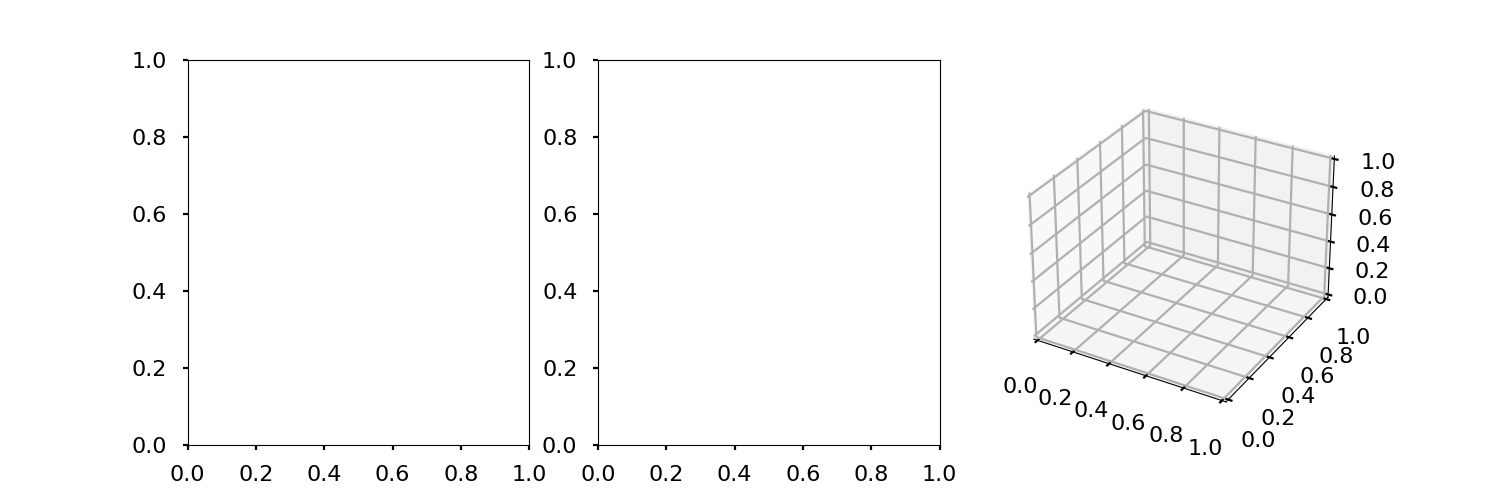

In [59]:
%matplotlib widget
import numpy as np
from mpl_toolkits import mplot3d
import warnings,json

plt.style.use('seaborn-poster')
cmap = plt.cm.jet

os.chdir('/Users/bashit.a/Documents/Alzheimer/July-2021/BNL-Data/sorted/')   # July-2021/BNL-Data/sample-3/  July-2021/BNL-Data/sorted/
file = "1892_EC-roi0_masked.h5"                                              # '1892_FC-roi0_masked.h5'      # "2029_Dentate_gyrus-roi0_masked.h5"
dt  = h5xs(file, transField="em2_sum_all_mean_value")

fig  = plt.figure(figsize=(15,5))
axs0 = fig.add_subplot(1, 3, 1)
axs1 = fig.add_subplot(1, 3, 2)
axs2 = fig.add_subplot(1, 3, 3, projection='3d')

x = dt.fh5[f"{dt.samples[0]}/primary/data/ss_sx"][...]
y = dt.fh5[f"{dt.samples[0]}/primary/data/ss_sz"][...]
print('average difference of a y-axis = ' , np.abs(np.sum( y[1:] - y[:-1])/(len(y)-1)))

Iq = read_Iq(file, scattering='_WAXS2')
z = find_rep_value(qgrid2, Iq , args=1.24, method = 'point')  # np.ones(len(x))  find_rep_value(qgrid2, Iq , args=1.24, method = 'point')
# z = np.clip(z,0, 0.07)
axs0.scatter(x, y, c =z, cmap = cmap, marker ='.', s=60)

# Set axes label
axs0.set_xlabel('x', fontsize=9)
axs0.set_ylabel('y', fontsize=9)
axs0.tick_params(axis='x', labelsize=8)
axs0.tick_params(axis='y', labelsize=8)

dt  = h5xs(file, transField="em2_sum_all_mean_value")

header = json.loads(dt.fh5[dt.samples[0]].attrs['start'])
print(header['snaking'])

xpos = dt.fh5[f"{dt.samples[0]}/primary/data/ss_sx"][...]
ypos = dt.fh5[f"{dt.samples[0]}/primary/data/ss_sz"][...]

axs1.plot(xpos, ypos, linewidth=0.5)   
# axs1.scatter(xpos, ypos, s = 3)
axs1.tick_params(axis='x', labelsize=8)
axs1.tick_params(axis='y', labelsize=8)

axs2.scatter3D(x, y, z, c =z, cmap = cmap, marker ='o', s=40)
axs2.view_init(azim=-90, elev=90)
axs2.set_xlabel('x', labelpad=20, fontsize=9)
axs2.set_ylabel('y', labelpad=20, fontsize=9)
axs2.set_zlabel('z', labelpad=20, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [8]:
%matplotlib widget

file = "2029_Dentate_gyrus-roi0_masked.h5"
dt  = h5xs(file, transField="em2_sum_all_mean_value")

header = json.loads(dt.fh5[dt.samples[0]].attrs['start'])
Height, Width = header['shape']
npatterns = Height*Width
print(header['snaking'])
print(f'Width = {Width}, Height = {Height}, Total diff. patterns = {npatterns}')

xpos = dt.fh5[f"{dt.samples[0]}/primary/data/ss_sx"][...]
ypos = dt.fh5[f"{dt.samples[0]}/primary/data/ss_sz"][...]

print(int(len(y)/Height))
fr = np.full(npatterns,0)
inc = np.arange(0, npatterns, Width)
print(inc)
for i,_ in enumerate(inc[:-1]):
    fr[inc[i]:inc[i+1]] = np.full(Width,np.random.randint(low=30,high=150))

frs = np.arange(0,npatterns,1)
xmin = np.min(x); xmax = np.max(x); 
ymin = np.min(y); ymax = np.max(y); 


def format_coord(x,y):
    if xmin <= x <= xmax and ymin <= y <= ymax:
        A = frs[np.isclose(y,  ypos, atol=1e-03,)]
        B = frs[np.isclose(x,  xpos, atol=1e-03,)]
        return 'x=%1.2f, y=%1.2f, FRAME=%d' % (x,y,np.array(list(set(A) & set(B)), dtype=int))
    else:
        return 'x=%1.2f, y=%1.2f, FRAME=UNDETECTED' % (x,y)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(xpos, ypos, c=fr, marker = '.', s=100)
# ax.plot(xpos, ypos,)
ax.format_coord = format_coord
plt.tight_layout()

[False, True]
Width = 63, Height = 124, Total diff. patterns = 7812
63
[   0   63  126  189  252  315  378  441  504  567  630  693  756  819
  882  945 1008 1071 1134 1197 1260 1323 1386 1449 1512 1575 1638 1701
 1764 1827 1890 1953 2016 2079 2142 2205 2268 2331 2394 2457 2520 2583
 2646 2709 2772 2835 2898 2961 3024 3087 3150 3213 3276 3339 3402 3465
 3528 3591 3654 3717 3780 3843 3906 3969 4032 4095 4158 4221 4284 4347
 4410 4473 4536 4599 4662 4725 4788 4851 4914 4977 5040 5103 5166 5229
 5292 5355 5418 5481 5544 5607 5670 5733 5796 5859 5922 5985 6048 6111
 6174 6237 6300 6363 6426 6489 6552 6615 6678 6741 6804 6867 6930 6993
 7056 7119 7182 7245 7308 7371 7434 7497 7560 7623 7686 7749]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
### WAXS frame removal --------
file = '2428_FC-roi1.h5'          # must input source file name
frame = 3740                      # frame to be replaced
value = -1                        # value to be replaced with

def waxs_frame_edit(file, frame, value):
   
    ### read/write hdf file
    with h5py.File(file,'r+') as hdf:
        dset = hdf.get(f'{h5_top_group(file)}/primary/data')
        dset['pilW2_image'][frame] = np.full_like(dset['pilW2_image'][frame],value)
    print(f'{file} WAXS {frame} is replaced by {value}')

waxs_frame_edit(file, frame, value)

2428_FC-roi1.h5 WAXS 3740 is replaced by -1


In [46]:
%matplotlib widget
import matplotlib as mpl

file       = '2029_Dentate_gyrus-roi0.h5'
scattering = '_WAXS2'
q_value    = 1.34

Width, Height = width_height(file)
Iq = read_Iq(file, scattering)
diff_patterns = find_rep_value(qgrid2, Iq , args=q_value, method = 'point')
img_orig = snaking(Width, Height, diff_patterns)

mpl.rcParams['contour.negative_linestyle'] = 'solid' # This sets even the negative values in contour lines to have a solid Line # By default, it is dashed lines for negative values.
f = plt.figure(figsize=(17,6), constrained_layout=False)
ax = f.subplots(nrows=1, ncols=1, )
def do_plot(level, cmap):
    ax.clear()
    us = np.linspace(min(diff_patterns), max(diff_patterns), level, endpoint=True) # For Manual selection of colour bar
    cf = ax.contourf(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig,0), us, origin='lower', cmap=cmap, )
    l = ax.contour(np.arange(0, Width, 1), np.arange(0,Height,1), np.flip(img_orig,0), us, colors='k') # For plotting only contours
    print(l.)
    ax.set_xlabel('X-->',  fontsize=10) # Label for X axis
    ax.set_ylabel('Y-->', fontsize=10) # Label for y axis
    ax.set_xticks(np.arange(0 , Width,30)) # Setting ticks for x-axis gridlines # x axis will range from 0 to 360 in steps of 30.
    ax.set_yticks (np.arange(0, Height, 30)) # Setting ticks for y-axis gridlines    # y axis will range from-90 to 90 in steps of 15
    ax.set_title(f'{file}') # Title
    ax.set_aspect('equal')

# plt.savefig("TvsZ4.eps", format=' eps', dpi=200) # Saving the image as an eps file
plt.tight_layout()  

cmap           = ipywidgets.Dropdown(options= cmap_list(),                  value = 'jet',                           description='Color Map ',    disabled=False)
level = ipywidgets.IntSlider(min=2, max=30, value=3)
ipywidgets.interactive(do_plot,level=level, cmap=cmap)

qvalue is : 1.3400
Minimum, Maximum Iq : 0.0202, 0.0648


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=3, description='level', max=30, min=2), Dropdown(description='Color Map …

In [3]:
%matplotlib widget

parameters = {'files':['2029DG-paper.csv','result.csv','result.csv'], 'directories':['/Users/bashit.a/Documents/Alzheimer/July-2021/BNL-Data/sample-6', '/Users/bashit.a/Documents/Alzheimer/Dec-2020', '/Users/bashit.a/Documents/Alzheimer/July-2021/BNL-Data/sample-7'], \
              'column':['IqBSTS','IqBSTS','IqBSTS'], 'indices':[[13,42,321],[0,1,2,3,4,5,6,7,8],[0,1,2,3]], 'colors':['r','g','b'], 'labels':['2029DG','2048','2109EC'], 'visibilities':[True, True, True]}
start, end = 130, 490                                       # ipywidget plot and classifer


def parenthesis_removal(new_str):
    for character in '[]':
        new_str = new_str.replace(character,'')
    return np.array(list(map(float,new_str.split(','))))

fig, ax = plt.subplots()
df  = {}
try:
    for i in range(len(parameters['files'])):
        df[i] = pd.read_csv(os.path.join(parameters['directories'][i],parameters['files'][i]), delimiter=',',)
        plt.plot(qgrid2[start:end], np.vstack(tuple(map(parenthesis_removal, df[i].iloc[parameters['indices'][i]]['IqBSTS'].values))).T[start:end,:], color= parameters['colors'][i], linewidth=2,label=parameters['labels'][i], visible=parameters['visibilities'][i])
#     
    plt.legend()

except:
    print(f'error in file {parameters["directories"][i]}/{parameters["files"][i]}')
else:
    print('successfully completed!')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

error in file /Users/bashit.a/Documents/Alzheimer/July-2021/BNL-Data/sample-7/result.csv


In [133]:
%matplotlib widget

background = cv2.imread('stained.tif')
overlay = cv2.imread('contour.tif')

## New width and height to resize the image
scale  = 100
width  = int(background.shape[1] * scale/100)
height = int(background.shape[0] * scale/100)

## Resizing the image
background = cv2.resize(background, (width, height), interpolation=cv2.INTER_AREA)
overlay = cv2.resize(overlay, (width, height), interpolation=cv2.INTER_AREA)

added_image = cv2.addWeighted(background,0.85,overlay,0.15, 0)
added_image = cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB)

plt.imshow(added_image)
plt.savefig(f'combined.tif', bbox_inches='tight', dpi=300) # Saving the image as an eps file

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [45]:
overlay[:,:,0]

array([[220, 220, 219, ...,  88,  94,  89],
       [219, 219, 219, ...,  87,  86,  81],
       [219, 219, 219, ...,  86,  82,  75],
       ...,
       [217, 217, 216, ...,  94,  91,  84],
       [215, 216, 216, ...,  88,  85,  80],
       [214, 215, 216, ...,  82,  83,  81]], dtype=uint8)

In [ ]:
## New width and height to resize the image
scale = 40
width = int(image.shape[1] * scale/100)
height = int(image.shape[0] * scale/100)

## Resizing the image
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)